# Sales Prediction with Linear Regression

In diesem Projekt wird ein Verkaufsprognosemodell entwickelt, um den Zusammenhang zwischen den Werbeausgaben in verschiedenen 
Kanälen und dem erzielten Umsatz zu untersuchen. Dabei wird zunächst eine einfache lineare Regression angewendet, gefolgt von 
der Erstellung eines umfassenderen Modells, das alle fünf Variablen im Datensatz berücksichtigt.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

Einfache lineare Regression mit OLS unter Verwendung von Scikit-Learn

### Bemerkung:  

Die LinearRegression()-Funktion von scikit-learn verwendet standardmäßig die Methode der gewöhnlichen kleinsten Quadrate (OLS) 
zur Schätzung der Regressionskoeffizienten und zur Vorhersage.

In [2]:
df = pd.read_csv(r"C:\Users\Naime Diler\Desktop\PycharmProjects\datasets/advertising.csv")

### Datensatz:

Die Daten geben Auskunft über die Verkäufe in Relation zu den Ausgaben für Fernsehen, Radio und Zeitung. Zum Beispiel ergibt 
sich bei Ausgaben von 230,10 Einheiten für Fernsehen, 37,80 Einheiten für Radio und 69,20 Einheiten für Zeitung ein Verkauf von 
22,10 Einheiten.

df.head()

In [3]:
df.shape

(200, 4)

Um das grundlegende Konzept der Regression zu verdeutlichen und zu verstehen, werden in diesem Beispiel zwei Variablen aus
diesem DataFrame ausgewählt und damit fortgefahren.

In [4]:
X = df[["TV"]]
y = df[["sales"]]

Zuerst wird die angenommene lineare Beziehung zwischen diesen beiden Variablen modelliert und anschließend wird die 
Modellgleichung mithilfe eines Diagramms bewertet.

# Modell

In [6]:
reg_model = LinearRegression().fit(X, y)

### Die Gleichung der Regressionsgeraden

Die Gleichung y_pred = b + wx ist die grundlegende Form einer linearen Funktion und wird in der linearen Regression als die 
Gleichung der Regressionsgeraden verwendet. In dieser Gleichung repräsentiert y_pred die vorhergesagten Werte der abhängigen 
Variable, x die unabhängige Variable, w die Steigung der Regressionsgeraden und b den y-Achsenabschnitt (Intercept).

In [7]:
# b = Konstante (bias, intercept)

reg_model.intercept_[0]

7.032593549127693

In [8]:
# w = Koeffizient (Steigung)

reg_model.coef_[0][0]

0.047536640433019764

# Prognose

manuelle Berechnung der Vorhersage basierend auf den Regressionskoeffizienten des Modells und einem festgelegten Wert für die
unabhängige Variable:

Welcher Umsatz wird erwartet, wenn die Ausgaben für Fernsehen 150 Einheiten betragen?

In [9]:
reg_model.intercept_[0] + reg_model.coef_[0][0]*150

14.163089614080658

Bei einem Fernsehausgabenbetrag von 500 Einheiten, wie hoch wäre der Umsatz?

In [11]:
reg_model.intercept_[0] + reg_model.coef_[0][0]*500

30.800913765637574

# Visualisierung des Modells

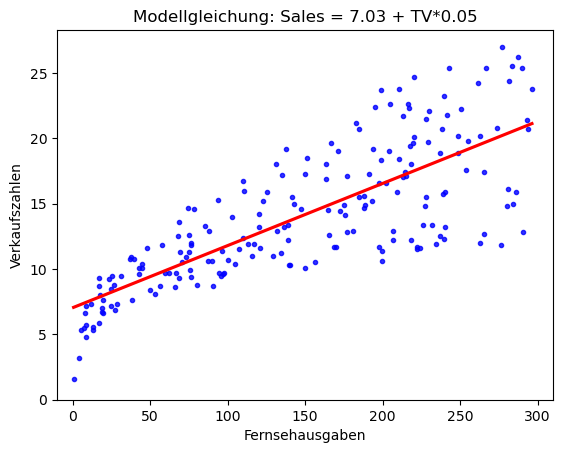

In [12]:
# ohne Konfidenzintervall:

g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(f"Modellgleichung: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Verkaufszahlen")
g.set_xlabel("Fernsehausgaben")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

oder: 

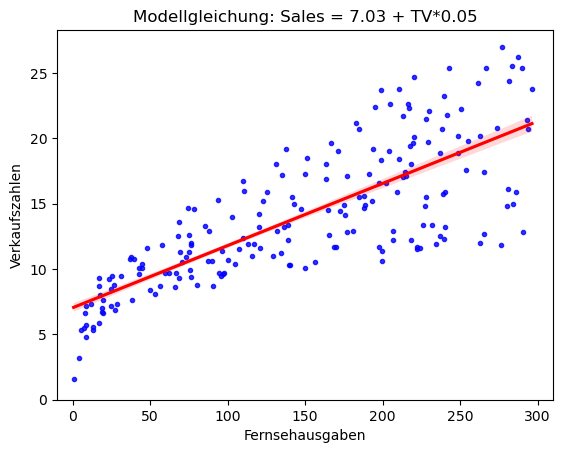

In [13]:
# Das Konfidenzintervall ist auf 68 eingestellt, was bedeutet, dass ein Intervall mit einer Breite von 68% um die 
# Regressionsgerade herum angezeigt wird. Diese Darstellung zeigt neben der Regressionslinie auch die Vertrauensintervalle 
# für die Regressionskoeffizienten an. Mit 68%iger Sicherheit kann man sagen, dass die wahre Regressionslinie innerhalb dieses 
# Intervalls liegt. 

g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=68, color="r")

g.set_title(f"Modellgleichung: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Verkaufszahlen")
g.set_xlabel("Fernsehausgaben")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

# Prognosegenauigkeit (Evaluierung)

Verwendung der predict-Methode des trainierten Regressionsmodells, um Vorhersagen automatisch für eine Matrix von Eingabedaten 
X zu generieren:

In [14]:
y_pred = reg_model.predict(X)

In [15]:
# MSE:

mean_squared_error(y, y_pred) 

10.512652915656757

Ein MSE-Wert von 10 bedeutet, dass die durchschnittliche quadratische Abweichung zwischen den beobachteten (tatsächlichen) und den vorhergesagten Werten 10 Einheiten beträgt. Dies ist aber nur eine hypothetische Interpretation und nicht bedeutet, dass jeder einzelne vorhergesagte Wert 10 Einheiten von den tatsächlichen Werten abweichen wird. 

In [16]:
y.mean()

sales   14.02
dtype: float64

In [17]:
y.std()

sales   5.22
dtype: float64

Die Verwendung der Standardabweichung der tatsächlichen Beobachtungen (y.std()) kann helfen, den MSE besser einzuschätzen, 
indem sie uns einen Maßstab dafür liefert, wie groß die Fehler im Vergleich zur Variation der tatsächlichen Werte sind.
Ebenso kann der Mittelwert (y.mean()) der tatsächlichen Beobachtungen dazu beitragen, den MSE in einen Kontext zu setzen und 
das Ausmaß der durchschnittlichen Fehler im Verhältnis zu den durchschnittlichen tatsächlichen Werten zu verstehen.

In dieser Situation könnte der erzielte Wert von 10 als etwas größer betrachtet werden. Eine angemessenere Schwelle wäre ein 
durchschnittlicher Fehler von etwa 1,5 bis 2. Auch wenn ein kleinerer Fehler bevorzugt wird, ist die Beurteilung seiner Größe 
oft unklar. Dabei wird der Durchschnitt und die Standardabweichung der abhängigen Variablen betrachtet. Wenn der Durchschnitt 
der Verkäufe bereits 14 Einheiten beträgt und der durchschnittliche Fehler bei 10 Einheiten liegt, ist die Vorhersage eher als 
hoch und potenziell problematisch zu bewerten.

In [18]:
# RMSE

np.sqrt(mean_squared_error(y, y_pred))

3.2423221486546887

In [19]:
# MAE

mean_absolute_error(y, y_pred)

2.549806038927486

In [20]:
# R² (Determinationskoeffizient)

reg_model.score(X, y)

0.611875050850071

# Multiple Linear Regression

In [21]:
df = pd.read_csv(r"C:\Users\Naime Diler\Desktop\PycharmProjects\datasets/advertising.csv")

In [22]:
X = df.drop('sales', axis=1)
y = df[["sales"]]

# Modell

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

reg_model = LinearRegression().fit(X_train, y_train)

In [24]:
# Konstante (b - bias)

reg_model.intercept_

array([2.90794702])

In [25]:
# Koeffizient (w - weights)

reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

# Prognose

Basierend auf den folgenden Beobachtungswerten, wie hoch ist der erwartete Verkaufswert?

TV: 30
radio: 10
newspaper: 40

b = 2.90
0.0468431 =w1 , 0.17854434 =w2, 0.00258619 = w3

Sales = 2.90  + TV * 0.04 + radio * 0.17 + newspaper * 0.002

In [26]:
2.90794702 + 30 * 0.0468431 + 10 * 0.17854434 + 40 * 0.00258619

6.20213102

In [27]:
neue_Daten = [[30], [10], [40]]
neue_Daten = pd.DataFrame(neue_Daten).T

reg_model.predict(neue_Daten)

array([[6.202131]])

# Prognosegenauigkeit (Evaluierung)

In [28]:
y_pred = reg_model.predict(X_train)

In [29]:
# Train RMSE

np.sqrt(mean_squared_error(y_train, y_pred))

1.7369025901470923

In [30]:
# TRAIN R²

reg_model.score(X_train, y_train)

0.8959372632325174

In [31]:
y_pred = reg_model.predict(X_test)

In [32]:
# Test RMSE

np.sqrt(mean_squared_error(y_test, y_pred))

1.4113417558581587

In [33]:
# Test R²

reg_model.score(X_test, y_test)

0.8927605914615384

In [ ]:
# 10-fache Kreuzvalidierung RMSE

np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10, 
                                 scoring="neg_mean_squared_error")))

In [ ]:
# 5-fache Kreuzvalidierung RMSE

np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="neg_mean_squared_error")))

In [ ]:
# Kreuzvalidierung, ohne vorherige Aufteilung des Datensatzes in Trainings- und Testsets

X = df.drop('sales', axis=1)  
y = df[["sales"]]             

reg_model = LinearRegression()

# Kreuzvalidierung und Bewertung
negative_mean_squared_errors = cross_val_score(reg_model, X, y, cv=10, scoring="neg_mean_squared_error")
root_mean_squared_errors = np.sqrt(-negative_mean_squared_errors)
mean_rmse = root_mean_squared_errors.mean()


print("Durchschnittlicher RMSE über 10-Fold Cross-Validation:", mean_rmse)